## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset

In [2]:
bank_data = pd.read_csv('bank-full.csv', delimiter=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Data Understanding

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank_data.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [8]:
bank_data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [9]:
bank_data.kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

### Missing Values

In [10]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Duplicated Values

In [11]:
bank_data[bank_data.duplicated()].shape

(0, 17)

### Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [12]:
discrete_feature = [feature for feature in bank_data.columns if len(bank_data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [13]:
continuous_feature = [feature for feature in bank_data.columns if bank_data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


## 4. Exploratory Data Analysis

In [14]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


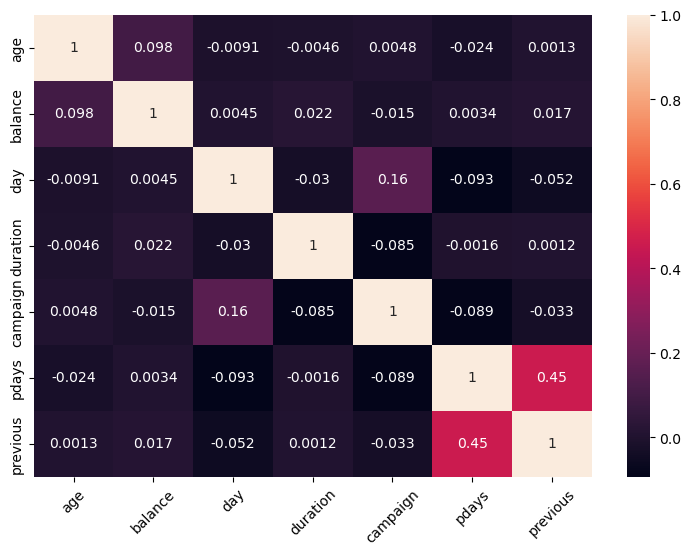

In [15]:
fig = plt.figure(figsize= (9,6))
sns.heatmap(bank_data.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

### Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

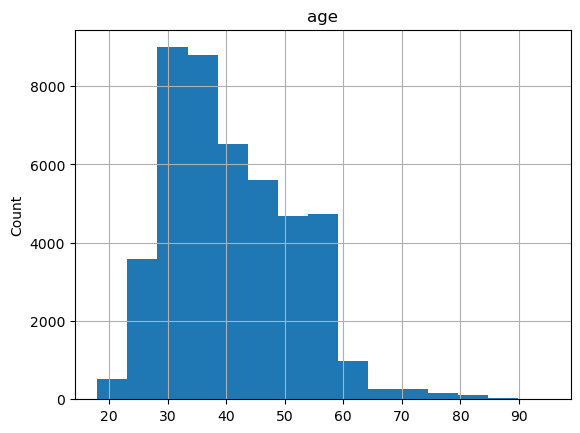

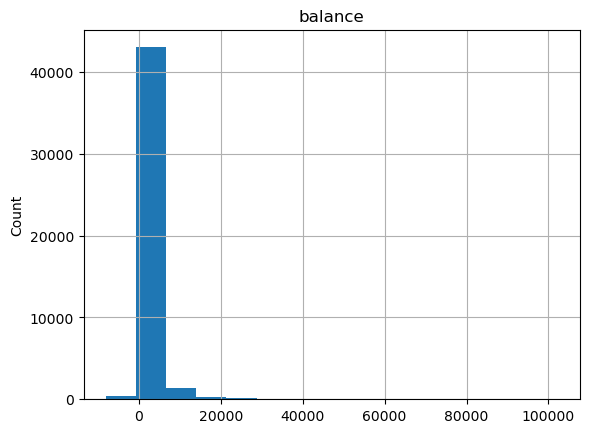

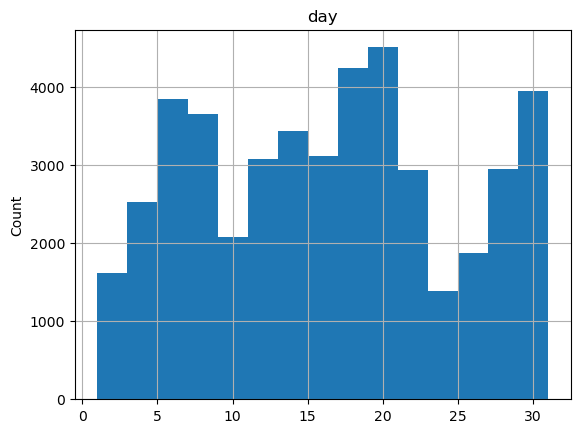

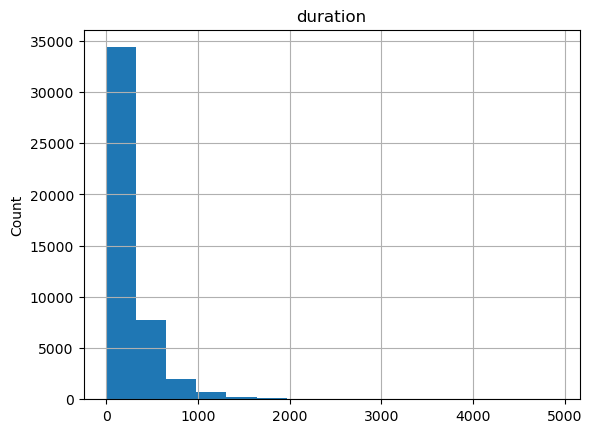

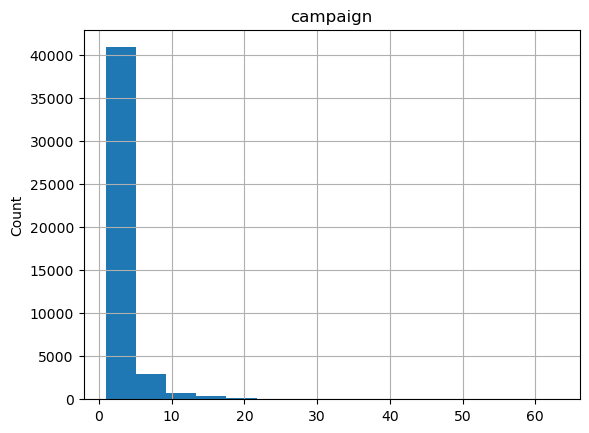

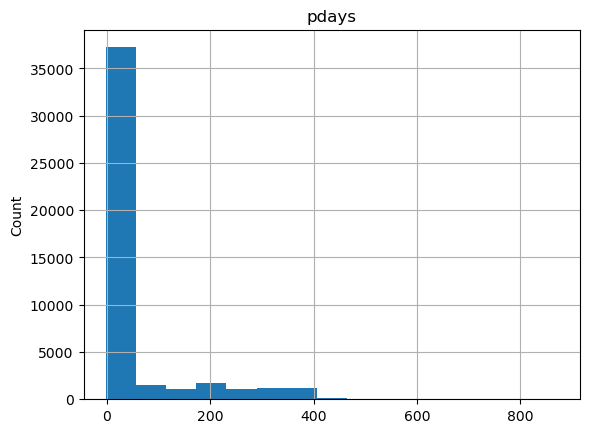

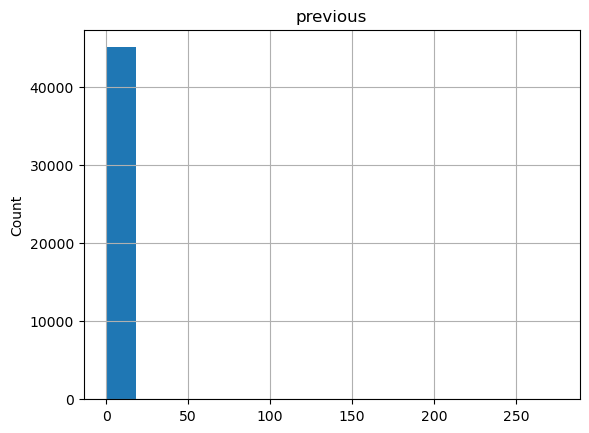

In [16]:
for feature in continuous_feature:
    bank_data1 = bank_data.copy()
    bank_data1[feature].hist(bins=15)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### Log transformation

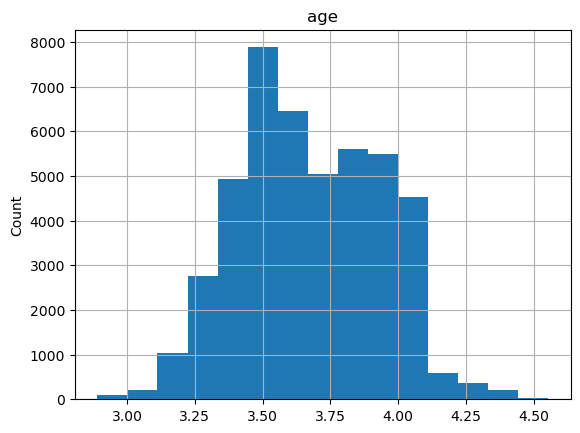

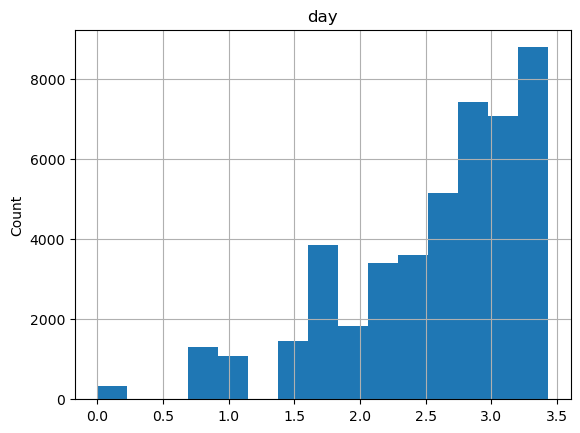

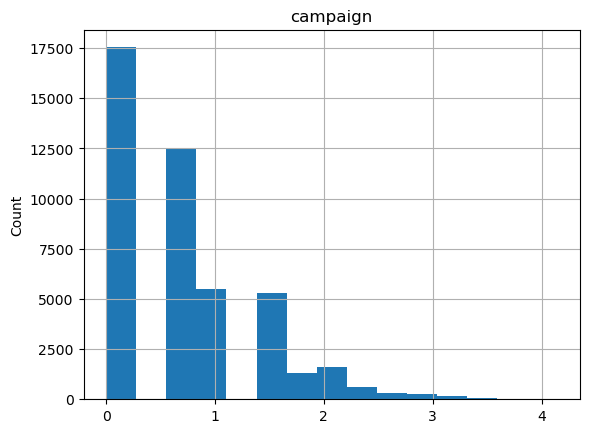

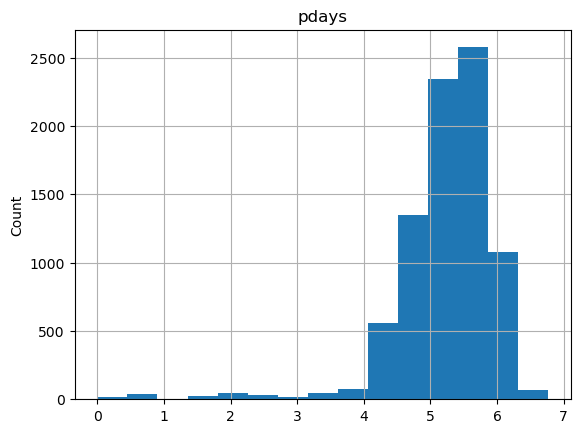

In [17]:
for feature in continuous_feature:
    bank_data2 = bank_data.copy()
    if 0 in bank_data2[feature].unique():
        pass
    else:
        bank_data2[feature] = np.log(bank_data2[feature])
        bank_data2[feature].hist(bins=15)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

### Outliers Detection

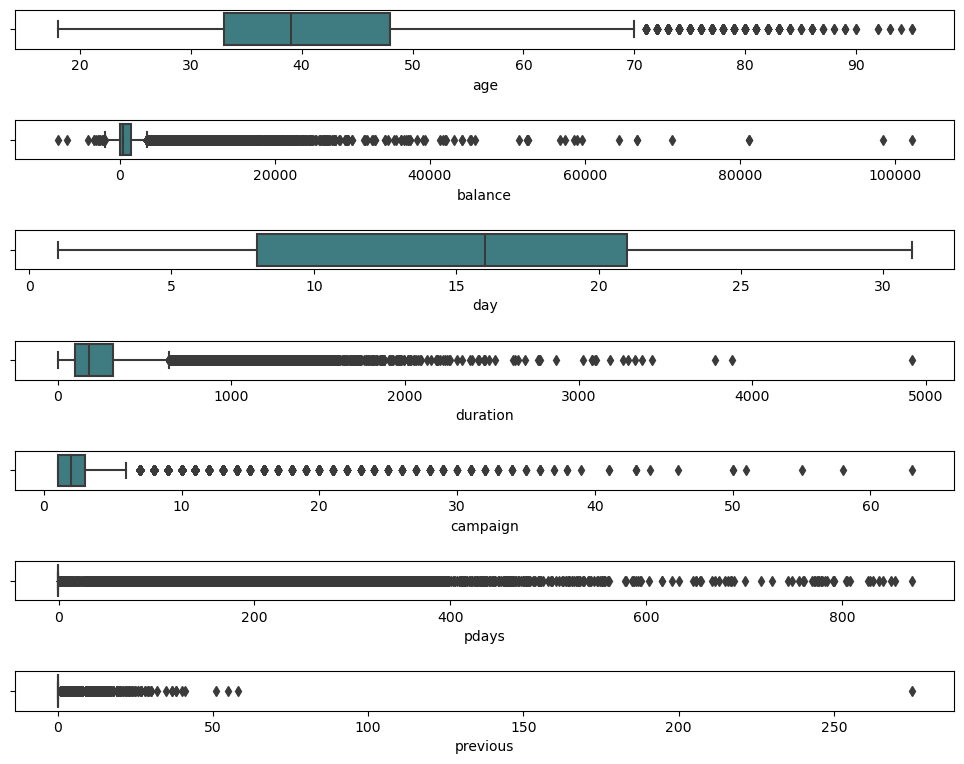

In [18]:
outlier = bank_data.copy()
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building
### After Log-Transformation

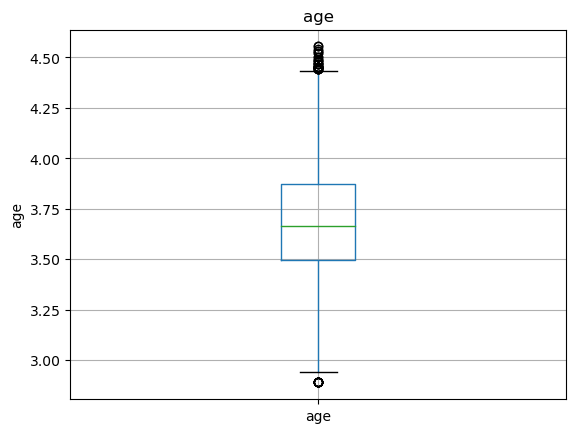

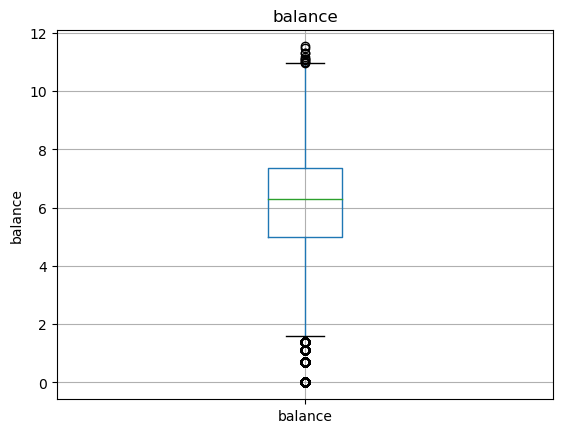

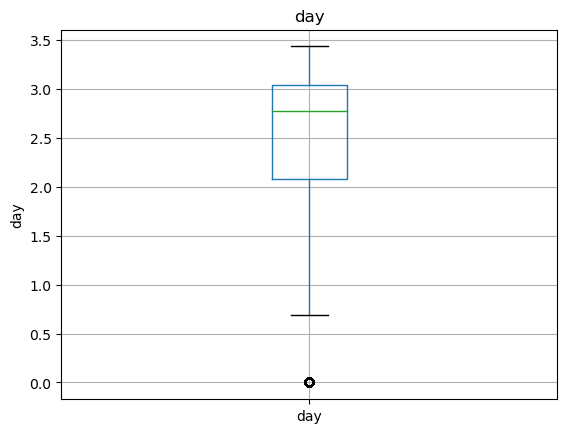

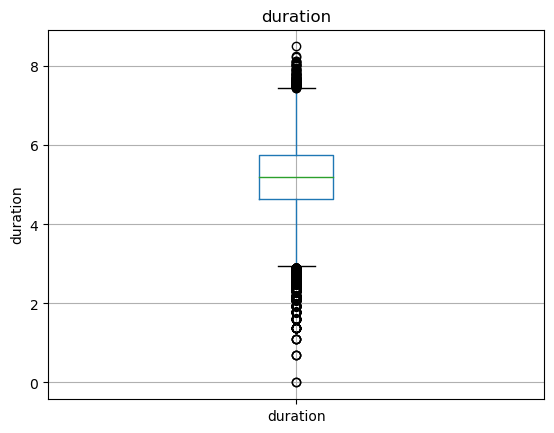

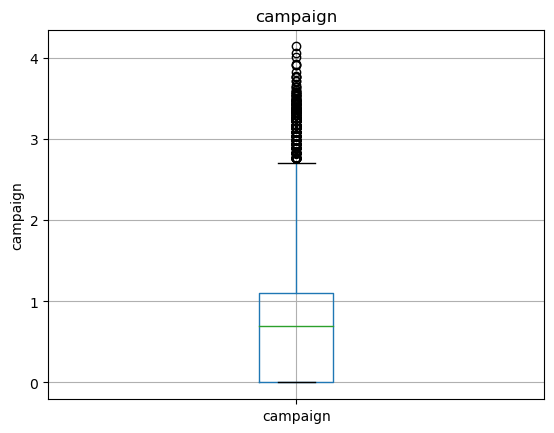

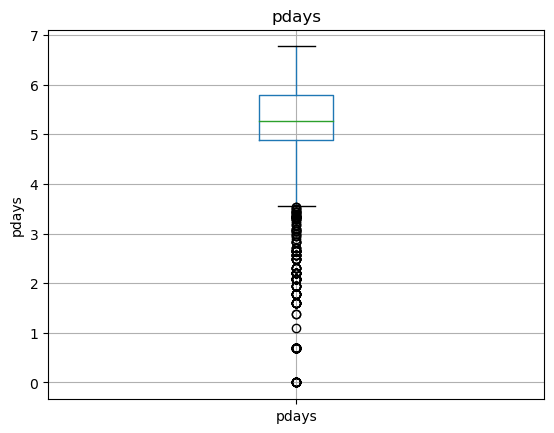

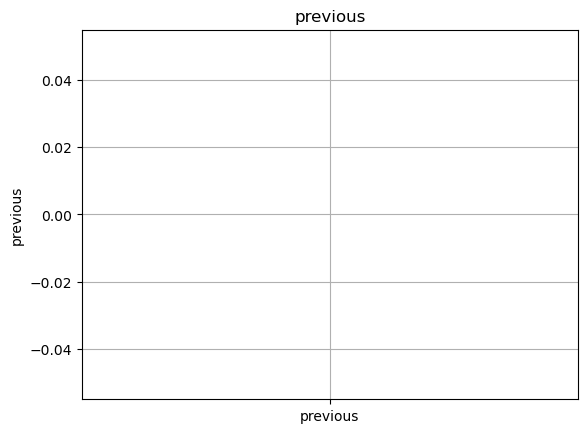

In [19]:
for feature in continuous_feature:
    bank_data3 = bank_data.copy()
    bank_data3[feature] = np.log(bank_data3[feature])
    bank_data3.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## 5. Data Preprocessing

In [20]:
bank_data[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = bank_data[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
bank_data_new = bank_data

In [21]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


### Label Encoding

In [22]:
bank_data_new['month'] = bank_data_new['month'].cat.codes
bank_data_new['job'] = bank_data_new['job'].cat.codes
bank_data_new['marital'] = bank_data_new['marital'].cat.codes
bank_data_new['education'] = bank_data_new['education'].cat.codes
bank_data_new['default'] = bank_data_new['default'].cat.codes
bank_data_new['housing'] = bank_data_new['housing'].cat.codes
bank_data_new['loan'] = bank_data_new['loan'].cat.codes
bank_data_new['contact'] = bank_data_new['contact'].cat.codes
bank_data_new['poutcome'] = bank_data_new['poutcome'].cat.codes
bank_data_new['y'] = bank_data_new['y'].cat.codes

## 6. Model Building

In [23]:
x1 = bank_data_new.drop('y', axis=1)
y1 = bank_data_new[['y']]

In [24]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [25]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
logistic_model.coef_

array([[-2.32953396e-02,  1.53638025e-02, -1.11393741e-01,
        -1.69939341e-02, -5.32844853e-03,  3.41203845e-05,
        -2.18534519e-01, -6.54023873e-02, -2.25305210e-01,
        -1.86565000e-02, -6.67753318e-02,  3.48039589e-03,
        -3.20964557e-01, -9.73783186e-04,  1.31746536e-01,
        -2.13310210e-01]])

In [29]:
logistic_model.intercept_

array([-0.08458766])

#### MinMaxScaler

In [30]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(bank_data_new)
scaled_x = scalar.transform(bank_data_new)

In [31]:
scaled_x

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

In [32]:
classifier1 = LogisticRegression()
classifier1.fit(scaled_x,y1)

LogisticRegression()

In [33]:
classifier1.coef_

array([[ 0.0870051 ,  0.04775924,  0.12651324,  0.16252677, -0.0576052 ,
         0.03974224, -0.34339486, -0.23072377, -0.46707242, -0.10404694,
         0.124258  ,  0.90757706, -0.1296082 ,  0.21393142,  0.01923177,
        -0.1480058 , 13.73203525]])

In [34]:
proba1 = classifier1.predict_proba(scaled_x)
proba1

array([[9.99760781e-01, 2.39218924e-04],
       [9.99762234e-01, 2.37766449e-04],
       [9.99832546e-01, 1.67453699e-04],
       ...,
       [1.67888481e-03, 9.98321115e-01],
       [9.99598875e-01, 4.01125023e-04],
       [9.99437111e-01, 5.62889153e-04]])

In [35]:
y_pred1 = classifier1.predict(scaled_x)
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

## 7. Model Testing || 8. Model Evaluation

### Train Data

In [36]:
y_pred_train1 = logistic_model.predict(x_train)

In [37]:
print(confusion_matrix(y_train, y_pred_train1))

[[31345   584]
 [ 3504   735]]


In [38]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [39]:
accuracy_score(y_train,y_pred_train1)

0.8869719088697191

AUC score : 81.63%


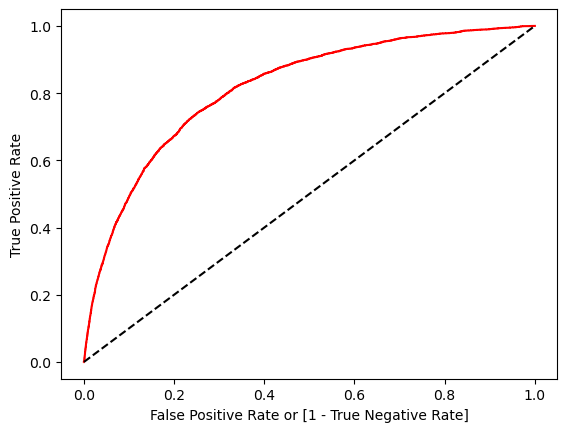

In [40]:
fpr, tpr, thresholds = roc_curve(y_train,logistic_model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_train,logistic_model.predict_proba (x_train)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
classification_report1 = classification_report(y_train,y_pred_train1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



### Test Data

In [42]:
y_pred_test1 = logistic_model.predict(x_test)

In [43]:
print(confusion_matrix(y_test,y_pred_test1))

[[7847  146]
 [ 853  197]]


In [44]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.57      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [45]:
accuracy_score(y_test,y_pred_test1)

0.8895278115669578

AUC score : 83.00%


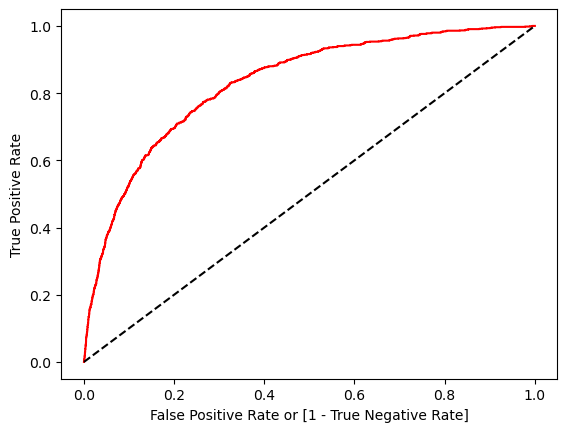

In [46]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,logistic_model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [47]:
classification_report2 = classification_report(y_test,y_pred_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.57      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



### Compare the train-set and test-set accuracy

#### Check for overfitting and underfitting (the scores on training and test set)

In [48]:
print('Training set score : {:.2f}%'.format(logistic_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(x_test, y_test)*100))

Training set score : 88.70%
Test set score     : 88.95%


## 9. Model Deployement

In [49]:
from pickle import dump

In [50]:
dump(logistic_model,open('Bank_Prediction.pkl','wb'))

In [51]:
from pickle import load

In [52]:
loaded_logistic_model = load(open('Bank_Prediction.pkl','rb'))

In [53]:
y_pred = loaded_logistic_model.predict(x_test)

# THE END  !!!